### 목표
- 간단한 데이터를 만들어서 RNN의 구조를 익혀보자 !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터셋 구축하기
- 문자 하나하나를 단위로 RNN을 사용해보자
- hello, apple, lobby, daddy, bobby

In [2]:
# 문제 데이터는 hell, appl, lobb, dadd, bobb
# 정답 데이터는 o, e, y, y, y

# timesteps는 4

### 원핫인코딩으로 문자를 숫자로 변경
- 문제 + 정답 전체 데이터에서 등장하는 문자는 h, e, l, o, a, p, b, y, d로 총 9개
- RNN 데이터의 구조 파악을 위해 직접 원핫인코딩을 해보자 !

In [3]:
# 문제 데이터
X_train = np.array([[[1,0,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0,0]], # h, e, l, l
                    [[0,0,0,0,1,0,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0,0], [0,0,1,0,0,0,0,0,0]], # a, p, p, l
                    [[0,0,1,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]], # l, o, b, b
                    [[0,0,0,0,0,0,0,0,1], [0,0,0,0,1,0,0,0,0], [0,0,0,0,0,0,0,0,1], [0,0,0,0,0,0,0,0,1]], # d, a, d, d
                    [[0,0,0,0,0,0,1,0,0], [0,0,0,1,0,0,0,0,0], [0,0,0,0,0,0,1,0,0], [0,0,0,0,0,0,1,0,0]] # b, o, b, b
                    ])

In [4]:
# 정답 데이터
y_train = np.array([[0,0,0,1,0,0,0,0,0], # o
                    [0,1,0,0,0,0,0,0,0], # e
                    [0,0,0,0,0,0,0,1,0], # y
                    [0,0,0,0,0,0,0,1,0], # y
                    [0,0,0,0,0,0,0,1,0] # y
                    ])

In [5]:
X_train.shape, y_train.shape
# samples(샘플수), timesteps(순환횟수), features(특성수)

((5, 4, 9), (5, 9))

### 출력되는 값을 알파벳 전체로 하고 싶다면 26개로 원핫인코딩하면됨
- 현재는 RNN의 구조를 알아보기위해 간단히 9개 문자로만 문제와 정답을 설정한 상태

### RNN 신경망 모델링

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [7]:
model = Sequential()

# 입력층 + SimpleRNN층 1개
# 8개의 뉴런을 가지고 각 뉴런이 4번씩 순환하며 각 순환마다 9개의 숫자가 돌아감
model.add(SimpleRNN(8, input_shape=(4,9)))

# 출력층
model.add(Dense(9, activation='softmax'))

model.summary()

# RNN은 가중치가 두 종류가 있음(과거데이터의 가중치, 현재데이터의 가중치)
# 현재데이터의 가중치 -> 9(입력특성) * 8(RNN층 뉴런수) + 8(RNN층 뉴런수 = b값)
# 과거데이터의 가중치 -> 8(RNN층 뉴런수) * 8(RNN층 뉴런수)
# RNN층의 각 뉴런들이 뽑아낸 결과는 다시 같은 층의 모든 뉴런들에게 과거데이터로 들어가게 됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 144       
                                                                 
 dense (Dense)               (None, 9)                 81        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['acc']
              )

In [ ]:
h = model.fit(X_train, y_train, epochs = 200)

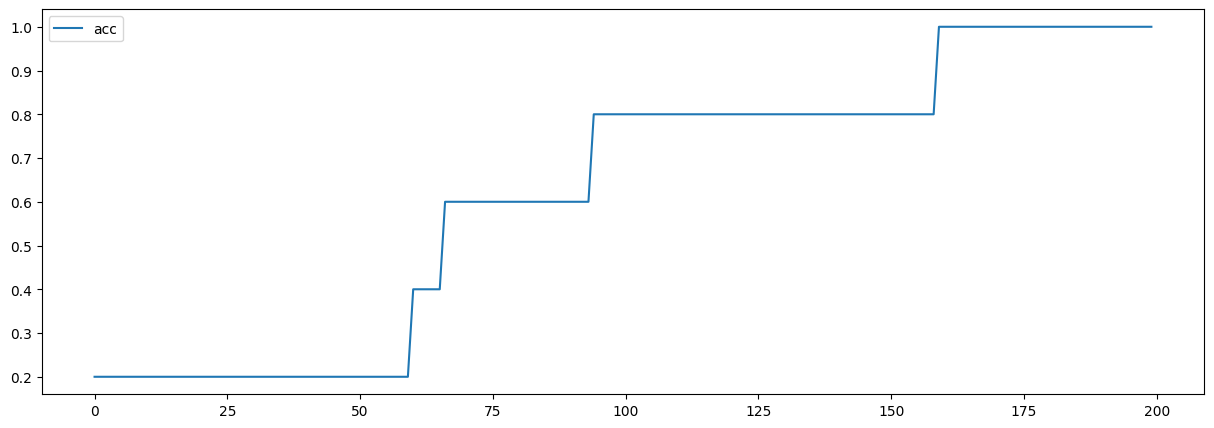

In [10]:
plt.figure(figsize = (15,5))
plt.plot(h.history['acc'], label = 'acc')
plt.legend()
plt.show()

In [11]:
# apple을 넣어서 e가 잘 나오는지 확인해보자 !
input_word = np.array([[[0,0,0,0,1,0,0,0,0],
                        [0,0,0,0,0,1,0,0,0],
                        [0,0,0,0,0,1,0,0,0],
                        [0,0,1,0,0,0,0,0,0]]])
input_word.shape

(1, 4, 9)

In [12]:
model.predict(input_word)
# h, e, l, o, a, p, b, y, d 순서대로 확률값이 출력

1/1 [==============================] - 0s 162ms/step


array([[0.08133362, 0.37743515, 0.04288267, 0.30133024, 0.03690463,
        0.03995991, 0.0244195 , 0.03981395, 0.05592029]], dtype=float32)